## Table of Contents

### 1. Importing libraries and data
### 2. Private, non-profit institutions
##### 1. Data preprocessing
##### 2. Elbow technique
##### 3. K-means clustering
##### 4. Import geographic data and add to private dataframe

# 01. Importing libraries and data

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
import pylab as pl
from sklearn.preprocessing import StandardScaler

In [2]:
# Ensure charts show in notebook
%matplotlib inline

In [3]:
# Define path
path = r'/Users/taraperrigeold/Documents/Documents - Tara Perrige’s MacBook Pro/CareerFoundry/College Cost Analysis'

In [4]:
# Check output
path

'/Users/taraperrigeold/Documents/Documents - Tara Perrige’s MacBook Pro/CareerFoundry/College Cost Analysis'

In [5]:
# Import data set for private, non-profit institutions
private = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'private_data.pkl'))

In [6]:
# Check head
private.head()

,UNITID,NAME,CITY,STATE,ZIP,REGION,LOCALE,COSTT4_A,NPT4_PRIV,DEBT_MDN,FAMINC,ADM_RATE,SAT_AVG,UGDS,RET_FT4_POOLED,UGDS_WHITE,COST_CATEGORY
0,100937,Birmingham-Southern College,Birmingham,AL,35254,5,12.0,52176.0,25494.0,18500.0,86672.871041,0.5666,1232.0,1265.0,0.7769,0.7858,Middle cost
1,101189,Faulkner University,Montgomery,AL,36109-3390,5,12.0,33944.0,25557.0,14925.0,36952.206116,0.5227,1069.0,2079.0,0.5611,0.4238,Middle cost
2,101365,Herzing University-Birmingham,Birmingham,AL,35209,5,21.0,26128.0,17906.0,12233.0,26184.228503,0.9500,NaN,544.0,0.5000,0.2813,Middle cost
3,101435,Huntingdon College,Montgomery,AL,36106-2148,5,12.0,35685.0,20136.0,16250.0,53792.633136,0.5841,1100.0,1078.0,0.6602,0.6503,Middle cost
4,101541,Judson College,Marion,AL,36756,5,43.0,31735.0,16619.0,14112.0,28123.817955,0.4820,1054.0,259.0,0.5973,0.6988,Middle cost


In [7]:
# Check shape
private.shape

(1402, 17)

# 02. Private, non-profit institutions

## 01. Data preprocessing

In [8]:
# Show head
private.head()

,UNITID,NAME,CITY,STATE,ZIP,REGION,LOCALE,COSTT4_A,NPT4_PRIV,DEBT_MDN,FAMINC,ADM_RATE,SAT_AVG,UGDS,RET_FT4_POOLED,UGDS_WHITE,COST_CATEGORY
0,100937,Birmingham-Southern College,Birmingham,AL,35254,5,12.0,52176.0,25494.0,18500.0,86672.871041,0.5666,1232.0,1265.0,0.7769,0.7858,Middle cost
1,101189,Faulkner University,Montgomery,AL,36109-3390,5,12.0,33944.0,25557.0,14925.0,36952.206116,0.5227,1069.0,2079.0,0.5611,0.4238,Middle cost
2,101365,Herzing University-Birmingham,Birmingham,AL,35209,5,21.0,26128.0,17906.0,12233.0,26184.228503,0.9500,NaN,544.0,0.5000,0.2813,Middle cost
3,101435,Huntingdon College,Montgomery,AL,36106-2148,5,12.0,35685.0,20136.0,16250.0,53792.633136,0.5841,1100.0,1078.0,0.6602,0.6503,Middle cost
4,101541,Judson College,Marion,AL,36756,5,43.0,31735.0,16619.0,14112.0,28123.817955,0.4820,1054.0,259.0,0.5973,0.6988,Middle cost


In [9]:
# Rename columns
private.rename(columns = {'COSTT4_A' : 'AVG_COST', 'NPT4_PRIV' : 'AVG_NET_PRICE', 'UGDS' : 'NUM_STUDENTS', 'RET_FT4_POOLED' : 'RET_RATE', 'UGDS_WHITE' : 'PCT_WHITE'}, inplace = True)

In [10]:
# Check output
private.head()

,UNITID,NAME,CITY,STATE,ZIP,REGION,LOCALE,AVG_COST,AVG_NET_PRICE,DEBT_MDN,FAMINC,ADM_RATE,SAT_AVG,NUM_STUDENTS,RET_RATE,PCT_WHITE,COST_CATEGORY
0,100937,Birmingham-Southern College,Birmingham,AL,35254,5,12.0,52176.0,25494.0,18500.0,86672.871041,0.5666,1232.0,1265.0,0.7769,0.7858,Middle cost
1,101189,Faulkner University,Montgomery,AL,36109-3390,5,12.0,33944.0,25557.0,14925.0,36952.206116,0.5227,1069.0,2079.0,0.5611,0.4238,Middle cost
2,101365,Herzing University-Birmingham,Birmingham,AL,35209,5,21.0,26128.0,17906.0,12233.0,26184.228503,0.9500,NaN,544.0,0.5000,0.2813,Middle cost
3,101435,Huntingdon College,Montgomery,AL,36106-2148,5,12.0,35685.0,20136.0,16250.0,53792.633136,0.5841,1100.0,1078.0,0.6602,0.6503,Middle cost
4,101541,Judson College,Marion,AL,36756,5,43.0,31735.0,16619.0,14112.0,28123.817955,0.4820,1054.0,259.0,0.5973,0.6988,Middle cost


In [11]:
# Get data types of columns
private.dtypes

UNITID             int64
NAME              object
CITY              object
STATE             object
ZIP               object
REGION             int64
LOCALE           float64
AVG_COST         float64
AVG_NET_PRICE    float64
DEBT_MDN         float64
FAMINC           float64
ADM_RATE         float64
SAT_AVG          float64
NUM_STUDENTS     float64
RET_RATE         float64
PCT_WHITE        float64
COST_CATEGORY     object
dtype: object

In [12]:
# Check for missing values
private.isnull().sum()

UNITID             0
NAME               0
CITY               0
STATE              0
ZIP                0
REGION             0
LOCALE             0
AVG_COST           0
AVG_NET_PRICE      0
DEBT_MDN           0
FAMINC             0
ADM_RATE         274
SAT_AVG          634
NUM_STUDENTS       0
RET_RATE           0
PCT_WHITE          0
COST_CATEGORY      0
dtype: int64

In [13]:
# Drop rows where SAT_AVG is missing (too many to impute)
private = private[private['SAT_AVG'].notnull()]

In [14]:
# Check missing values
private.isnull().sum()

UNITID           0
NAME             0
CITY             0
STATE            0
ZIP              0
REGION           0
LOCALE           0
AVG_COST         0
AVG_NET_PRICE    0
DEBT_MDN         0
FAMINC           0
ADM_RATE         0
SAT_AVG          0
NUM_STUDENTS     0
RET_RATE         0
PCT_WHITE        0
COST_CATEGORY    0
dtype: int64

In [15]:
# Check for duplicates
dups_priv = private[private.duplicated()]

In [16]:
# Check dups_priv
dups_priv.shape

(0, 17)

In [17]:
# Remove non-numerical columns, as well as UNITID, REGION, and LOCALE which are only stored as a numbers
priv_num = private.drop(columns = ['UNITID', 'NAME', 'CITY', 'STATE', 'ZIP', 'REGION', 'LOCALE', 'COST_CATEGORY'])

In [18]:
# Check output
priv_num.head()

,AVG_COST,AVG_NET_PRICE,DEBT_MDN,FAMINC,ADM_RATE,SAT_AVG,NUM_STUDENTS,RET_RATE,PCT_WHITE
0,52176.0,25494.0,18500.0,86672.871041,0.5666,1232.0,1265.0,0.7769,0.7858
1,33944.0,25557.0,14925.0,36952.206116,0.5227,1069.0,2079.0,0.5611,0.4238
3,35685.0,20136.0,16250.0,53792.633136,0.5841,1100.0,1078.0,0.6602,0.6503
4,31735.0,16619.0,14112.0,28123.817955,0.4820,1054.0,259.0,0.5973,0.6988
6,35463.0,14611.0,19740.0,53850.791005,0.4704,1094.0,1294.0,0.7216,0.5796


In [19]:
# Show descriptive stats
priv_num.describe()

,AVG_COST,AVG_NET_PRICE,DEBT_MDN,FAMINC,ADM_RATE,SAT_AVG,NUM_STUDENTS,RET_RATE,PCT_WHITE
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,45939.281250,23460.290365,17534.222656,72572.112752,0.634095,1148.290365,2223.440104,0.760764,0.594090
std,12931.413497,6339.335438,4198.252404,23694.681951,0.209666,132.467635,2356.535974,0.119263,0.196750
min,12714.000000,1964.000000,4242.000000,21952.625348,0.043600,809.000000,23.000000,0.386000,0.000000
25%,37387.250000,19298.250000,15000.000000,55287.556057,0.518425,1060.750000,884.000000,0.686150,0.493075
50%,44440.500000,22512.000000,18000.000000,67829.314536,0.660300,1126.000000,1540.500000,0.770100,0.628750
75%,54483.750000,26784.750000,20393.750000,85995.405459,0.776500,1206.250000,2635.000000,0.837750,0.735025
max,75735.000000,45559.000000,27000.000000,145228.221830,1.000000,1522.000000,19548.000000,1.000000,0.948300


In [20]:
# Save StandardScaler as object
scaler = StandardScaler()

In [21]:
# Standardize private dataframe
priv_std = scaler.fit_transform(priv_num)

In [22]:
# Show final shape
priv_std.shape

(768, 9)

## 02. Elbow technique

In [23]:
# Define range of potential clusters and define k-means clusters in that range
num_cl = range(1,10)
kmeans = [KMeans(n_clusters = i) for i in num_cl]

In [24]:
# Create score that represents rate of variation for given clusters
score_priv = [kmeans[i].fit(priv_std).score(priv_std) for i in range(len(kmeans))]

In [25]:
# Show output
score_priv

[-6911.999999999994,
 -4625.120660683707,
 -3750.911350414081,
 -3387.4880361703235,
 -3076.5182559584478,
 -2827.404951887428,
 -2652.6311651467176,
 -2507.7235840317326,
 -2394.2482856304728]

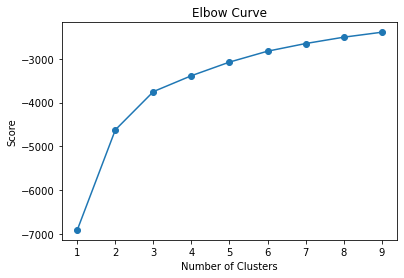

In [26]:
# Plot elbow curve using PyLab
pl.plot(num_cl, score_priv, marker = 'o')
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

I will use 3 clusters because it seems as though the last big 'jump' occurs from 2 to 3. After that, the line looks more horizontal.

## 03. K-means clustering

In [27]:
# Create kmeans object
kmeans_priv = KMeans(n_clusters = 3, n_jobs = -1)

In [28]:
# Fit object to the data
kmeans_priv.fit(priv_std)

/Users/taraperrigeold/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=3, n_jobs=-1)

In [29]:
# Create column with results of clustering
private['clusters'] = kmeans_priv.fit_predict(priv_std)

/Users/taraperrigeold/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


In [30]:
# Show output
private.head()

,UNITID,NAME,CITY,STATE,ZIP,REGION,LOCALE,AVG_COST,AVG_NET_PRICE,DEBT_MDN,FAMINC,ADM_RATE,SAT_AVG,NUM_STUDENTS,RET_RATE,PCT_WHITE,COST_CATEGORY,clusters
0,100937,Birmingham-Southern College,Birmingham,AL,35254,5,12.0,52176.0,25494.0,18500.0,86672.871041,0.5666,1232.0,1265.0,0.7769,0.7858,Middle cost,2
1,101189,Faulkner University,Montgomery,AL,36109-3390,5,12.0,33944.0,25557.0,14925.0,36952.206116,0.5227,1069.0,2079.0,0.5611,0.4238,Middle cost,0
3,101435,Huntingdon College,Montgomery,AL,36106-2148,5,12.0,35685.0,20136.0,16250.0,53792.633136,0.5841,1100.0,1078.0,0.6602,0.6503,Middle cost,0
4,101541,Judson College,Marion,AL,36756,5,43.0,31735.0,16619.0,14112.0,28123.817955,0.4820,1054.0,259.0,0.5973,0.6988,Middle cost,0
6,101693,University of Mobile,Mobile,AL,36613-2842,5,41.0,35463.0,14611.0,19740.0,53850.791005,0.4704,1094.0,1294.0,0.7216,0.5796,Middle cost,0


In [31]:
# Get value counts of clusters
private['clusters'].value_counts()

0    332
2    315
1    121
Name: clusters, dtype: int64

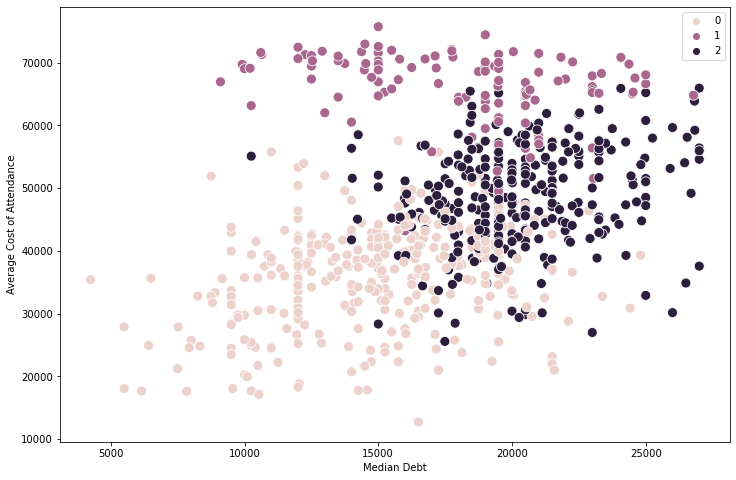

In [32]:
# Plot AVG_COST and DEBT_MDN
plt.figure(figsize = (12,8))
ax = sns.scatterplot(x = private['DEBT_MDN'], y = private['AVG_COST'], hue = kmeans_priv.labels_, s = 100)
ax.grid(False)
plt.xlabel('Median Debt')
plt.ylabel('Average Cost of Attendance')
plt.show()

In [33]:
# Make new column of clusters based on color
private.loc[private['clusters'] == 2, 'cluster'] = 'dark purple'
private.loc[private['clusters'] == 1, 'cluster'] = 'light purple'
private.loc[private['clusters'] == 0, 'cluster'] = 'pink'

## 04. Import geographic data and add to private dataframe

In [34]:
# Create list of variables to import
vars_list = ['UNITID', 'LATITUDE', 'LONGITUDE']

In [35]:
# Check output
vars_list

['UNITID', 'LATITUDE', 'LONGITUDE']

In [36]:
# Import data set with only columns from vars_list
df = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'Most-Recent-Cohorts-All-Data-Elements.csv'), usecols = vars_list)

In [37]:
# Check output
df.head()

,UNITID,LATITUDE,LONGITUDE
0,100654,34.783368,-86.568502
1,100663,33.505697,-86.799345
2,100690,32.362609,-86.174010
3,100706,34.724557,-86.640449
4,100724,32.364317,-86.295677


In [38]:
# Check shape
df.shape

(6806, 3)

In [39]:
# Check shape of private
private.shape

(768, 19)

In [40]:
# Merge df onto private
df_merged = private.merge(df, on = ['UNITID'], how = 'left')

In [41]:
# Check output
df_merged

,UNITID,NAME,CITY,STATE,ZIP,REGION,LOCALE,AVG_COST,AVG_NET_PRICE,DEBT_MDN,...,ADM_RATE,SAT_AVG,NUM_STUDENTS,RET_RATE,PCT_WHITE,COST_CATEGORY,clusters,cluster,LATITUDE,LONGITUDE
0,100937,Birmingham-Southern College,Birmingham,AL,35254,5,12.0,52176.0,25494.0,18500.0,...,0.5666,1232.0,1265.0,0.7769,0.7858,Middle cost,2,dark purple,33.513774,-86.850552
1,101189,Faulkner University,Montgomery,AL,36109-3390,5,12.0,33944.0,25557.0,14925.0,...,0.5227,1069.0,2079.0,0.5611,0.4238,Middle cost,0,pink,32.384181,-86.216410
2,101435,Huntingdon College,Montgomery,AL,36106-2148,5,12.0,35685.0,20136.0,16250.0,...,0.5841,1100.0,1078.0,0.6602,0.6503,Middle cost,0,pink,32.351034,-86.284366
3,101541,Judson College,Marion,AL,36756,5,43.0,31735.0,16619.0,14112.0,...,0.4820,1054.0,259.0,0.5973,0.6988,Middle cost,0,pink,32.629253,-87.315206
4,101693,University of Mobile,Mobile,AL,36613-2842,5,41.0,35463.0,14611.0,19740.0,...,0.4704,1094.0,1294.0,0.7216,0.5796,Middle cost,0,pink,30.793247,-88.128934
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,483018,Antioch College,Yellow Springs,OH,45387,3,31.0,51912.0,17420.0,8750.0,...,0.8358,1248.0,102.0,0.5400,0.5392,Middle cost,0,pink,39.799806,-83.888077
764,486901,Milligan University,Milligan,TN,37682,5,22.0,43349.0,20632.0,18781.0,...,0.8340,1213.0,780.0,0.7348,0.8192,Middle cost,2,dark purple,36.300147,-82.294070
765,487092,Emory University-Oxford College,Oxford,GA,30054,5,21.0,64708.0,30379.0,15000.0,...,0.2495,1427.0,992.0,0.7527,0.3155,Higher cost,1,light purple,33.619100,-83.871141
766,487524,Husson University,Bangor,ME,04401-2929,1,13.0,29384.0,18358.0,20265.0,...,0.8279,1035.0,2682.0,0.7573,0.8393,Middle cost,2,dark purple,44.829002,-68.791476


In [42]:
# Check shape
df_merged.shape

(768, 21)

In [43]:
# Export as excel file
df_merged.to_excel(os.path.join(path, '02 Data', 'Prepared Data', 'private_clusters.xlsx'), index = False)